一个典型的数据分析过程如下：
1. 数据收集
2. 探索性的分析
3. 数据清理
4. 特征工程
5. 模型训练 （包括通过交叉验证进行参数优化）
6. 项目交付或解释

探索性数据分析（Exploratory Data Analysis，简称EDA）：是指对已有的数据（特别是调查或观察得来的原始数据）在尽量少的先验假定下进行探索，通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。

1. 对数据有一个基础的感官认识
2. 例如：Shape(Training Size,Test Size);Label(Binary or Multi or Regression, Distribution);Columns(Meaning, Numerical or Time or Category);Null Values, how to deal with;Numerical variable: Distribution;Outliers








In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = 14, 10

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('./creditcard.csv')

data.head(5)

## class 标签表示是否欺诈

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print (data.shape)
print ()
print (data.info())
print ()
print (data.columns)
print ()
print (data.describe())

In [37]:
print (data.isnull().head(5))

print (data.isnull().sum().max())

print (data.isnull().any().head(5))  ##返回每列是否有TRUE值

0    284315
1       492
Name: Class, dtype: int64
    Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False  False  False   

   ...      V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
0  ...    False  False  False  False  False  False  False  False   False   
1  ...    False  False  False  False  False  False  False  False   False   
2  ...    False  False  False  False  False  False  False  False   False   
3  ...    False  False  False  False  False  False  False  False   False   
4  ...    False  False  False  False  False  False  False  False   False   

   Class  
0  False  
1  False  
2  False 

In [41]:
data.isnull().values.any()

False

In [43]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

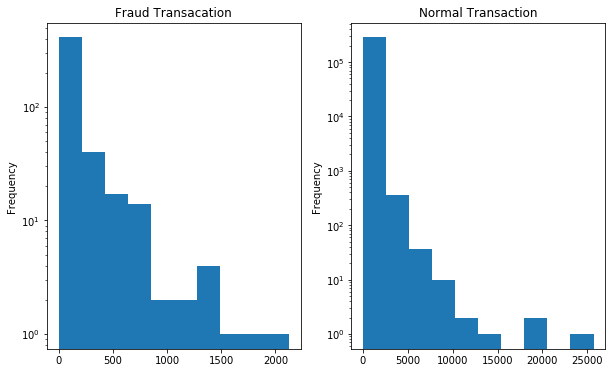

In [45]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.yscale('log')
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")
plt.yscale('log')

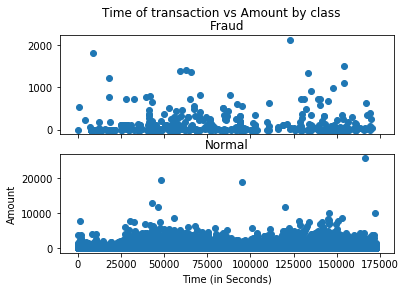

In [50]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud_transacation.Time, Fraud_transacation.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal_transacation.Time, Normal_transacation.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [56]:
set([0,0,0,1,1]) == {0,0,0,1,1}

True

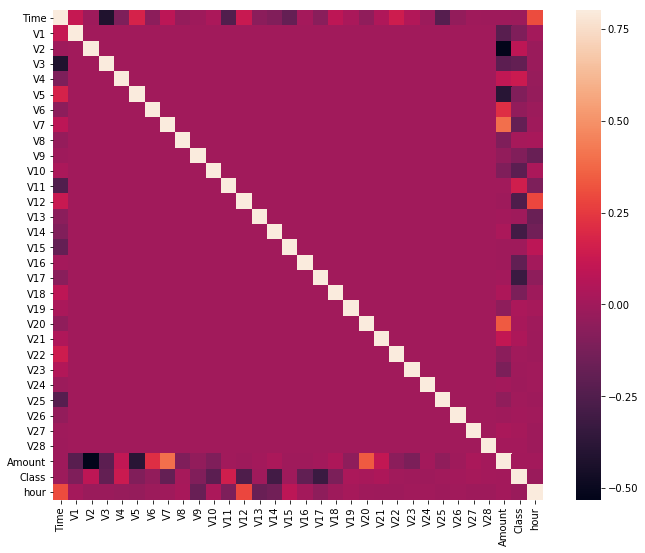

In [75]:
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [64]:
data['hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24) ## 1小时=60m*60s = 3600s, np.ceil 计算大于等于该值的最小整数
data.loc[:,['hour','Time']].head(5)

,hour,Time
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,2.0


In [66]:
data.pivot_table(values='Amount',index='hour',columns='Class',aggfunc='count')

Class,0,1
hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


In [76]:
print (data['Amount'].head(5))
data['Amount'].head(5).count()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64


5

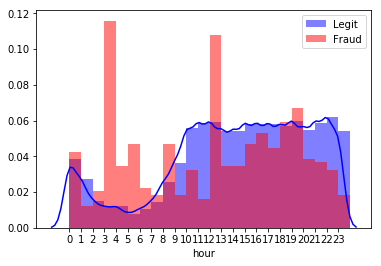

In [85]:
bins = np.arange(data['hour'].min(),data['hour'].max()+2)
##小时之间的分布
sns.distplot(data[data['Class']==0.0]['hour'],
             norm_hist=True,
             bins=bins,
             kde=True,
             color='b',
             hist_kws={'alpha':.5},
             label='Legit')
sns.distplot(data[data['Class']==1.0]['hour'],
             norm_hist=True,
             bins=bins,
             kde=False,
             color='r',
             label='Fraud',
             hist_kws={'alpha':.5})
plt.xticks(range(0,24))
plt.legend()

Text(0,0.5,'Fraud Ratio')

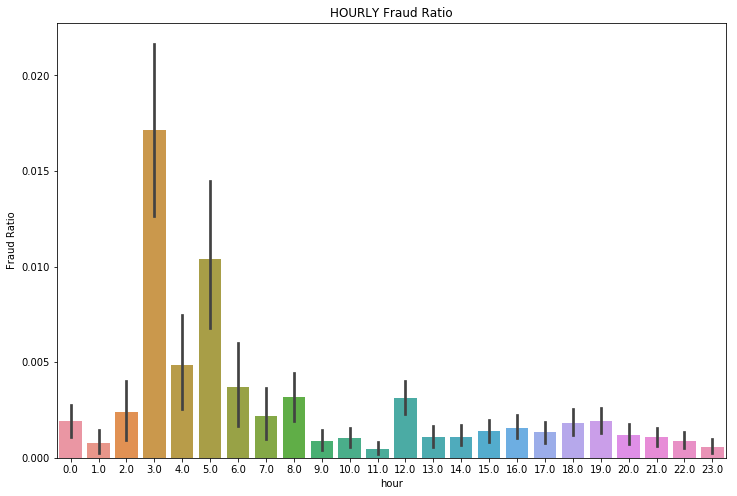

In [88]:
plt.figure(figsize=(12,8))
sns.barplot('hour', 'Class', data=data) ##按hour归类后，对class进行数值计算，默认为平均值，误差棒表示一个置信区间
plt.title('HOURLY Fraud Ratio')
plt.ylabel('Fraud Ratio')

In [ ]:
# https://github.com/pandas-profiling/pandas-profiling  调用该包，可以直接看见数据的一些情况
#import pandas_profiling

#profile = data.profile_report(title="Credit Fraud Detector")
#profile.to_file(output_file=Path("./credit_fraud_detector.html"))

**Outliers Detection**
1. Point anomalies: A single instance of data is anomalous if it’s too far off from the rest.
2. Contextual anomalies: The abnormality is context specific. This type of anomaly is common in time-series data.


判断标准：
$$IQR=Q_3−Q_1$$
$$Outliers:>Q_3+k⋅IQR$$
$$Outliers:<Q_1-k⋅IQR$$
**The higher k is (eg: 3), the less outliers will detect, and the lower k is (eg: 1.5) the more outliers it will detect. Q_3表示75%；Q_1表示25%；实际应用中仍然是通过经验去除离散点**



不平衡数据处理 unbanlanced

0.4~0.6 之间认为是平衡的，

不平衡处理方法：

1. 增加数据量（collect more data）
2. 给予权重参数，加大数据少的标签的权重，使之平衡； eg LogisticRegression(class_weight='balanced')
3. chage metric （改变评价指标）
4. sampling 采样

######评价指标

1. 混淆矩阵(confusion matrix)
  1. True Positives : The cases in which we predicted YES and the actual output was also YES.
  2. True Negatives : The cases in which we predicted NO and the actual output was NO.
  3. False Positives : The cases in which we predicted YES and the actual output was NO.
  4. False Negatives : The cases in which we predicted NO and the actual output was YES.

In [ ]:
# ture positive
def get_TP(y_true, y_pred):
    return sum((y_true==1)&(y_pred==1))

def get_FP(y_true, y_pred):
    return sum((y_true==0)&(y_pred==1))

def get_FN():
    return sum((y_true==1)&(y_pred==0))

def get_TN():
    return sum((y_true==0)&(y_pred==0))

def confusion_matrix(y_true, y_pred):
    TP = get_TP(y_true, y_pred)
    FN = get_FN(y_true, y_pred)
    FP = get_FP(y_true, y_pred)
    TN = get_TN(y_true, y_pred)
    return np.array([[TN, FP],[FN, TP]])

多分类一般转换为二分类进行处理

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label, pred)

正确率  (Accuracy)  (TP+TN)/Total   样本均衡的时候，会使用
精确率  (Precision)  TP/(TP+NP)   
召回率  (Recall)     TP/(TP+FN) 这三个评价指标很少用

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

F1 score 是精确率和召回率的调和平均数，越高的值表明模型越好，可在样本不平衡是使用，因为要通过设置阈值将概率转换为0，1，古阈值的设置会严重影响F1 score，这是一个缺点

$$F1 = \frac{2}{\frac{1}{precision}+\frac{1}{recall}} = \frac{2*precision*recall}{precision+recall}$$

In [ ]:
from sklearn.metrics import f1_score
f1_score(label, prediction)

We often assume that we defined a threshold of 0.5 for selecting which samples are predicted as positive. If we change this threshold the performance metrics will change. **It would be nice to be able to evaluate the performance of a model without the need to select an arbitrary threshold**. This is precisely what AUC-ROC is providing.



AUC Area Under Curve (AUC)–Area Under the curve of the Receiver Operating Characteristic (AUROC)  ROC曲线下的面积  

AUC is used for binary classification problem.

1. True Positive Rate (Sensitivity) : the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.  
    $$TPR = TP/(TP+FN)$$  
2. False Positive Rate (Specificity) : the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points   
    $$FPR = FP/(FP+TN)$$    


ROC即通过不断调整阈值，计算TPR与FPR，得到的以FPR为横坐标，TPR为纵坐标的的曲线图，AUC即该曲线下的面积，因为考虑了所有的阈值，故排除了阈值改变的影响。 ROC曲线要尽量远离参照线，越远，我们的模型预测效果越好。AUC则与0.5比较

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(label, prediction)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(label, prediction)               #较慢

In [ ]:
from numba import jit                                #加速

@jit
def fast_auc(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    nfalse = 0
    auc = 0
    n = len(y_true)
    for i in range(n):
        y_i = y_true[i]
        nfalse += (1 - y_i)
        auc += y_i * nfalse
    auc /= (nfalse * (n - nfalse))
    return auc

回归的评价指标

1. MAE
2. MSE

3. Log Loss 一般在神经网络里作为评价指标。 